## Using Artificial Sequential model we will be creating a binary classifier of Cat image, (CAT | NO CAT)

### 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- keras framework is used to construct the ANN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### 2 - Overview of the Problem set ##

**Problem Statement**: We are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

In [3]:
train_set_x_orig.shape

(209, 64, 64, 3)

y = [0], it's a 'non-cat' picture.


<function matplotlib.pyplot.show(*args, **kw)>

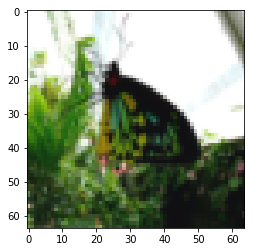

In [4]:
# Example of a picture
index = 16
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
plt.show

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 


    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### 2 - Flattening of the image ! ##
For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

We will reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [6]:
X_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
X_test_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

## 3 -Normalization of image !!
#### Since our image array is an array in range 0-255 we will do simple normalization first, i.e  we will divide the array by 255

In [7]:
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

In [8]:
y_train = train_set_y.T
y_test = test_set_y.T
np.unique(y_train)

array([0, 1])

In [9]:
X_train.shape[0]

209

In [10]:
print(X_train.shape)
print(y_train.shape)

(209, 12288)
(209, 1)


### To categorical features

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras import optimizers

classes = 2
y_train = np_utils.to_categorical(y_train, classes)
y_test1 = np_utils.to_categorical(y_test, classes)

Using TensorFlow backend.


##### Here it's cleary visible that it is a binary classification problem with prediction either 0 or 1. 

# 4- Model Architecture !!
##### We will be creating a 2 hidden layer ANN architecture with first layer as dense as 100 and activation function as 'sigmoid' and another activation function 'softmax'. Second layer is output layer with 'logistic' as output function. 

In [12]:
input_size = 12288
batch_size = 100
hidden_neurons = 100
epochs = 100

In [13]:
model = Sequential([
Dense(hidden_neurons, input_dim=input_size),
Activation('sigmoid'),
Dense(classes),
Dense(classes),
Activation('softmax')
])

model.compile(loss='categorical_crossentropy',
metrics=['binary_accuracy'], optimizer= 'rmsprop' )
# with sgd accuracy is 0.7
# adam as optimizer is bad
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100


/home/abhijeet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


209/209 [==============================] - 0s 1ms/step - loss: 6.0505 - binary_accuracy: 0.4354
Epoch 2/100
209/209 [==============================] - 0s 202us/step - loss: 9.2900 - binary_accuracy: 0.3445
Epoch 3/100
209/209 [==============================] - 0s 218us/step - loss: 8.6317 - binary_accuracy: 0.3445
Epoch 4/100
209/209 [==============================] - 0s 181us/step - loss: 8.1131 - binary_accuracy: 0.3445
Epoch 5/100
209/209 [==============================] - 0s 185us/step - loss: 7.7021 - binary_accuracy: 0.3493
Epoch 6/100
209/209 [==============================] - 0s 189us/step - loss: 6.9503 - binary_accuracy: 0.3493
Epoch 7/100
209/209 [==============================] - 0s 225us/step - loss: 6.4741 - binary_accuracy: 0.3493
Epoch 8/100
209/209 [==============================] - 0s 225us/step - loss: 4.5672 - binary_accuracy: 0.3493
Epoch 9/100
209/209 [==============================] - 0s 193us/step - loss: 0.7833 - binary_accuracy: 0.5215
Epoch 10/100
209/209 [==

In [14]:
Score = []
# fit the model
score = model.evaluate(X_test, y_test1, verbose=1) 
print('Test accuracy:', score[1])
y_hat_xgb = model.predict(X_test)
Score.append(score)

print('score :', np.mean(np.array(score)))


50/50 [==============================] - 0s 415us/step
Test accuracy: 0.7399999952316284
score : 0.6282858371734619


In [15]:
for i in range(len(y_hat_xgb)):
    print(y_hat_xgb[i], ' : ', y_test1[i])

[0.18800013 0.81199986]  :  [0. 1.]
[0.24654287 0.7534571 ]  :  [0. 1.]
[0.17345205 0.826548  ]  :  [0. 1.]
[0.2631778 0.7368221]  :  [0. 1.]
[0.2505988 0.7494013]  :  [0. 1.]
[0.45083922 0.5491608 ]  :  [1. 0.]
[0.23513338 0.7648666 ]  :  [0. 1.]
[0.27777922 0.7222208 ]  :  [0. 1.]
[0.2749914 0.7250086]  :  [0. 1.]
[0.1874158 0.8125843]  :  [0. 1.]
[0.5457183  0.45428172]  :  [0. 1.]
[0.3266768 0.6733232]  :  [0. 1.]
[0.35449862 0.6455014 ]  :  [0. 1.]
[0.28873205 0.71126795]  :  [1. 0.]
[0.8653632 0.1346369]  :  [1. 0.]
[0.25888097 0.741119  ]  :  [0. 1.]
[0.67204016 0.32795992]  :  [1. 0.]
[0.23535758 0.7646425 ]  :  [0. 1.]
[0.4580303 0.5419697]  :  [0. 1.]
[0.6256888 0.3743113]  :  [0. 1.]
[0.21649164 0.78350836]  :  [0. 1.]
[0.6558821 0.3441178]  :  [1. 0.]
[0.7589647  0.24103521]  :  [1. 0.]
[0.25831157 0.7416885 ]  :  [0. 1.]
[0.13964283 0.86035717]  :  [0. 1.]
[0.18369967 0.8163003 ]  :  [0. 1.]
[0.35656956 0.6434305 ]  :  [0. 1.]
[0.40087306 0.59912694]  :  [1. 0.]
[0.3838866

In [16]:
y_pred = np.argmax(y_hat_xgb, axis = 1)

In [17]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.74

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

In [ ]:
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]):
        print(i)
        
    #print(y_pred[i], " : ", y_test[i])

In [ ]:
test_set_x_orig[10].shape

In [ ]:
plt.imshow(test_set_x_orig[1])
plt.show()